In [40]:
# Import the required modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from imblearn.over_sampling import SMOTE
nltk.download("stopwords")
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
# exploring fake job postings
fake_job_df = pd.read_csv("fake_job_postings.csv")
fake_job_df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [14]:
#Replace NaNs with empty strings
fake_job_df.fillna("", inplace=True)
fake_job_df.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [15]:
fake_job_df["text"] = fake_job_df["title"] + " " + fake_job_df["company_profile"] + " " + fake_job_df["description"] + " " + fake_job_df["requirements"]

In [16]:
stop_words = set(stopwords.words("english"))
# Remove special characters and numbers, set to lowercase and remove stopwords
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)  
    cleaned_text = " ".join(word for word in text.split() if word not in stop_words)
    return cleaned_text

fake_job_df["text_cleaned"] =fake_job_df["text"].apply(clean_text)


In [17]:
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 words
X = vectorizer.fit_transform(fake_job_df["text_cleaned"])

X = X.toarray()  # Convert sparse matrix to array
y = fake_job_df["fraudulent"]  # Target variable (1 = fake, 0 = real)


In [18]:
# Split into testing and training sets, limit test to 20%, stratify y for imbalance 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, stratify=y) 

In [19]:
# Apply SMOTE only to training set
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [20]:
#Decision tree model - train and fit
dt_model = DecisionTreeClassifier(max_depth=10, random_state=4)
dt_model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=10, random_state=4)

In [21]:
#Random forest model - train and fit
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=4)
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(max_depth=10, random_state=4)

In [22]:
#Make predictions on models
dt_preds = dt_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

In [23]:
#calculate accuracy and other metrics
print("Decision Tree Performance:")
print(classification_report(y_test, dt_preds))

print("Random Forest Performance:")
print(classification_report(y_test, rf_preds))


Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      3403
           1       0.23      0.63      0.33       173

    accuracy                           0.88      3576
   macro avg       0.60      0.76      0.63      3576
weighted avg       0.94      0.88      0.90      3576

Random Forest Performance:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3403
           1       0.72      0.66      0.69       173

    accuracy                           0.97      3576
   macro avg       0.85      0.83      0.84      3576
weighted avg       0.97      0.97      0.97      3576



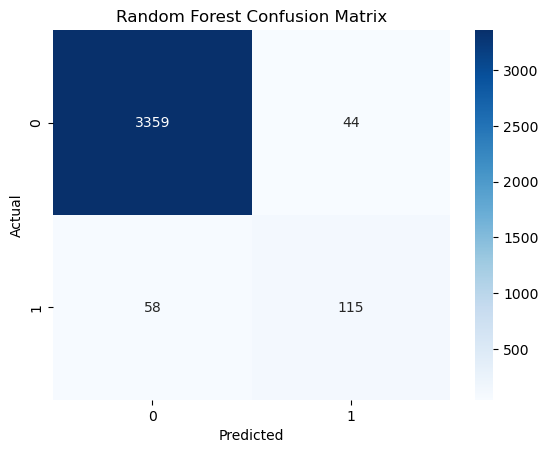

In [24]:
#plot confusion matrix 
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [25]:
#optimize model with Hyperparameter tuning
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
}
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train_resampled, y_train_resampled)

print("Best Parameters: ", rf_grid_search.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [26]:
grid_y_pred = rf_grid_search.predict(X_test)
print(classification_report(y_test, grid_y_pred,
                            target_names=["negative", "positive"]))

              precision    recall  f1-score   support

    negative       0.98      1.00      0.99      3403
    positive       0.98      0.66      0.79       173

    accuracy                           0.98      3576
   macro avg       0.98      0.83      0.89      3576
weighted avg       0.98      0.98      0.98      3576



In [27]:
import joblib

joblib.dump(rf_grid_search, "pickles/rfc_grid_search.pkl")  # Save model
joblib.dump(vectorizer, "pickles/rfc_vectorizer.pkl")  # Save vectorizer

['pickles/rfc_vectorizer.pkl']

In [28]:
def predict_fraud(job_text):
    job_text = clean_text(job_text)  # Preprocess text
    job_vectorized = vectorizer.transform([job_text]).toarray()  # Convert to TF-IDF
    prediction = rf_grid_search.predict(job_vectorized)  # Predict
    return "Fake Job Posting" if prediction[0] == 1 else "Real Job Posting"

new_job = "Looking for remote workers to earn $5000 per week with minimal effort. No experience needed!"
print(predict_fraud(new_job))

Real Job Posting


In [30]:
# loading model without rerunning everything
# import pickle
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import train_test_split

# # Split into testing and training sets, limit test to 20%, stratify y for imbalance 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4, stratify=y) 
# with open("pickles/rfc_grid_search.pkl", "rb") as file:
#     rfc_grid_search = pickle.load(file)

In [ ]:
# getting model accuracy
y_pred = rf_grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) 
f1 = f1_score(y_test, y_pred, pos_label=1)
print(f"Model Accuracy: {accuracy * 100:.2f}%") 
print(f"Model f1 of fraudulent: {f1 * 100:.2f}%") 
# save the accuracy to a .pkl file 
joblib.dump(accuracy, "pickles/rfc_accuracy.pkl")
joblib.dump(f1, "pickles/rfc_f1_score.pkl")

Model Accuracy: 98.32%
Model f1 of fraudulent: 79.31%


['pickles/rfc_f1_score.pkl']